

<p style="font-size:300%; background-color:pink; color:blue; text-align:center;line-height : 80px; margin : 0; padding : 0;">
Taller 7: Clasificación con RNA</p>
<p style="font-size:240%; background-color:pink; color:red; text-align:center;line-height : 60px; margin : 0; padding : 0;">
    
Técnicas de Inteligencia Artificial - Visión de Máquina </p1>

<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> 
  <br>Est. Brian Camilo Valencia Peña (bcvalenciap@unal.edu.co)
  <br>Est. Esteban Ladino Fajardo (eladinof@unal.edu.co)
</p>

<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><br>INGENIERÍA MECATRÓNICA Y ELECTRÓNICA</p>
<p style="font-size:180%; text-align:center; line-height : 30px; margin-top : 0; "> Facultad de Ingeniería</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> Universidad Nacional de Colombia Sede Bogotá</p>
<br>
<img src="../figs/Escudo_UN.png",width=100,height=100>

<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>3 de junio de 2022</p>

## Enunciado

1. Estudiar el uso de Redes Neuronales en scikit-learn.
    * Machine Learning with Neural Networks Using scikit-learn https://www.pluralsight.com/guides/
machine-learning-neural-networks-scikit-learn


2. Estudiar, evaluar y discutir el desempeño de las Redes Neuronales Artificiales como clasificador, cuando son aplicadas a un conjunto de vectores de características como el del proyecto que está desarrollando para el curso.


## Desarrollo Punto 1

El siguiente código fue proporcionado por Vargas [rrr1] y el objetivo es comentarlo. 



#### Algoritmo de entrenamiento del Perceptrón

* Una Epoca - por set de características
* Función de Activación: Escalón unitario
* Error: $\varepsilon = \bar{y} - y$, 
Donde,
    * $\bar{y}$: La salida deseada
    * Y: La salida actual 

In [1]:
# Librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

A continuación, se establecen las características de entrada y se les agrega el bias a la matriz para facilitar los cálculos

[[2.  3.  1. ]
 [8.  7.  1. ]
 [2.5 2.  1. ]
 [6.  4.  1. ]]
[[1.]
 [0.]
 [1.]
 [0.]]


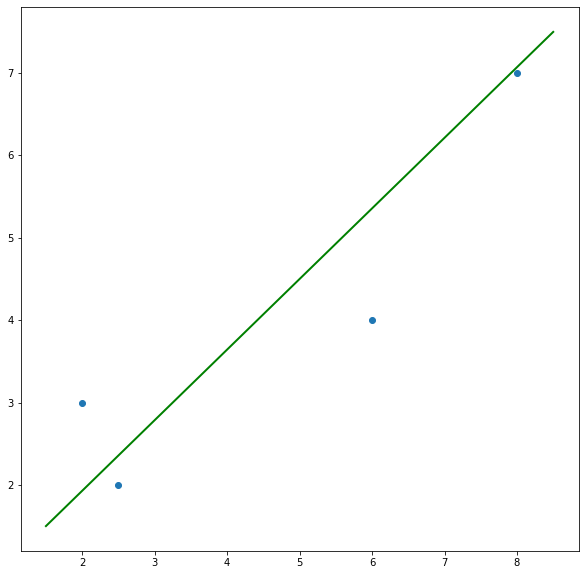

In [2]:
# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

#==============================================
#  X: Dataset de entrada en matriz donde cada fila es un ejemplo de entrentamiento
#  El último componente de cada fila hace referencia a un factor neutro que posteriormente 
# se va a multiplicar en la matriz w por un valor de bias. 
X = np.array([  [2.0,3.0,1],
                [8.0,7.0,1],
                [2.5,2.0,1],
                [6.0,4.0,1] ])

#X = np.array([  [2.0,1.0,1],
                #[8.5,9.0,1],
                #[8.0,2.0,1],
                #[1.5,8.5,1] ])

#==============================================
# output dataset   
# y: Dataset de salida Output, matriz donde cada fila es  un ejemplo de enrtenamiento.
# Este es el vector objetivo
y = np.array([[1.0,0.0,1.0,0.0]]).T

print (X)
print (y)

# Se halla el máximo y mínimo en X[:,0] y X[:,1], se le agregan 0.5 y se le restan 0.5 al final.
# Esto se hace para centrar el rango de impresión de la imagen

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.scatter(X[:,0], X[:,1])
plt.plot([x_min, x_max], [y_min, y_max], c='g', lw=2)

##### PASO 1
Se inicializan los pesos de las características y el valor de bias aleatoriamente a través una semilla con la instrucción np.random.seed(1). Estos valores de guardan en el vector de pesos W. En donde, el vector de w en su última posición corresponde el valor de bias multiplicado el número de características del vector de entrenamiento.



In [3]:
# seed random numbers to make calculation
# deterministic (just a good practice)
# Se establece una semilla para obtener los mismos resultados de números aleatorios 
# en diferentes equipos. [rrr2]
np.random.seed(1)

#==========================
#
# initialize weights randomly with mean 0
# syn0: First layer of weights, Synapse 0, connecting l0 to l1.

# Se crea el vector de peso de tamaño igual al de las columnas de manera random
W = np.random.random((X.shape[1])) - 1

# 
W[2]=W[2]*2
print ("\nW0:"); print (W)



W0:
[-0.582978   -0.27967551 -1.99977125]


##### Paso 2
Se evalue el net con la siguiente fórmula:

$$
\sum_{i=1}^n (W_iXi+b)
$$

Por facilidad la operación anterior se realiza a través del producto punto entre el vector caraterísticas X modificado y el vector de peso W en donde su última posición corresponde a valor de bias multiplicado por número de características. En forma general:

$$
net= (X_1, X_2,\cdots,X_n,1) \cdot (W_1, W_2,\cdots,W_n,nb) 
$$

In [4]:


#=========================
#PASO 2
# Se imprime cada X[m], y cada net obtenido a partir del peso W.
# En este caso no se realiza la actualización de pesos ni bias
# sino que se realiza por época (no significa que no exista error
# durante la evaluación).

for m in range(X.shape[0]):
    print ("\n------------------\nm: %d" %m)
    net = np.dot(X[m],W)
    print ("X[m]"); print (X[m])
    print ("net"); print (net)



------------------
m: 0
X[m]
[2. 3. 1.]
net
-4.0047537606336885

------------------
m: 1
X[m]
[8. 7. 1.]
net
-8.621323758649613

------------------
m: 2
X[m]
[2.5 2.  1. ]
net
-4.016567251724559

------------------
m: 3
X[m]
[6. 4. 1.]
net
-6.616341248381234


##### Paso 3

Se calcula el valor de salida según la siguiente función de activación:

$$
y=1\; si \; net \; > 0
$$
$$
y=0\; si \; net \; \leq 0
$$

A continuación, se implementa y se evalua la función de activación para el último vector de características.

In [5]:

#=========================
#PASO 3
#Se establecen las condiciones de salida de la red, en donde dependiendo del valor de net puede ser 0 o 1.

if net > 0: y_cal = 1
else: y_cal = 0
print ("y_cal"); print (y_cal)


y_cal
0


##### Paso 4

Se hace una actualización del peso y del bias así:

![figs/actualizacionPesoBias.png](figs/actualizacionPesoBias.png)


La actualización de pesos y bias al tenerlos en un mismo vector se debe hacer de la siguiente forma:

$$
W_{(k+1)}=(W_1, W_2,\cdots,W_n,b)+\epsilon (X_1, X_2,\cdots,X_n,1) 
$$

Al tener en cuenta que:
$$
W_{(k+1)}=W_k+\epsilon X_i
$$
$$
b_{(k+1)}=b_k+\epsilon 
$$



In [6]:

#=========================
#PASO 4
#Se realizan las comparaciones con el target esperado y se calcula el error.

error = y[m] - y_cal
print ("error");     print (error)

Delta = error*X[m]
print ("Delta");     print (Delta)

# update weights
# Se realiza la actualización de pesos para la siguiente iteración
n=len(W)-1
W[n]=W[n]/n
W = W + Delta.T
W[n]=W[n]*n
print ("W"); print (W)

#===========================================
#===========================================

y_min = (-W[0]*x_min - W[2])/W[1]
y_max = (-W[0]*x_max - W[2])/W[1]

# plt.scatter(X[:,0], X[:,1])
# plt.plot([x_min, x_max], [y_min, y_max], c='g', lw=2)

error
[0.]
Delta
[0. 0. 0.]
W
[-0.582978   -0.27967551 -1.99977125]


Nótese que para actualizar el vector de pesos y de bias se debe dividir por el número de caractísticas de la última posición y despúes de actualizar volver a multiplicar por el número de características.

##### Paso 5 y 6
Se deben repetir los pasos 2-4 hasta que los pesos no cambien o se llegue hasta el máximo número de iteraciones en todas las muestra de entrenamiento. En la siguiente función se realizan los pasos descritos anteriormente.

In [7]:
# MUCHAS ÉPOCAS
def entrenamientoPerceptron(X,y,W,interaciones):
    n_caracteristicas=X.shape[1]-1
    W[n_caracteristicas]=W[n_caracteristicas]*n_caracteristicas
    y=y.T

    interacionesFinales=0
    
    for j in range(interaciones):
        
        Nerrors = 0
        #=========================
        #PASO 2
        for m in range(X.shape[0]):
            net = np.dot(X[m],W)
            
        #=========================
        #PASO 3
            if net > 0: y_cal = 1
            else: y_cal = 0
        #=========================
        #PASO 4
            error = y[m] - y_cal
            Delta = error*X[m]
            # update weights
            W[n_caracteristicas]=W[n_caracteristicas]/n_caracteristicas
            W = W + Delta
            W[n_caracteristicas]=W[n_caracteristicas]*n_caracteristicas

            # print(f'Época: {j+1}\ncaracterística: {m+1}')
            # print(f'W: {W}\n')

            if error != 0: 
                Nerrors = Nerrors+1
        
        interacionesFinales=j+1

        if Nerrors == 0: 
            break
        #===========================================
        #===========================================

    W[n_caracteristicas]=W[n_caracteristicas]/n_caracteristicas
    return [W,interacionesFinales]

## Ejercicio de ejemplo
interaciones=1
X=np.array([
    [2.0,3.0,1],
    [2.5,2.0,1],
    [8.0,7.0,1],
    [6.0,4.0,1]
])

y=np.array([1.0,1.0,0.0,0.0]) # EN vector fila

W=np.array([0.1,0.1,0.1])
finalW,epocas=entrenamientoPerceptron(X,y,W,interaciones)


La frontera de decisión queda determinada por la siguiente ecuación:

$$
X_1W_1+X_2W_2+2b=0
$$

Los valores que se encuentren por encima de la linea son mayores a cero y por lo tanto pertenecen a la clase 1 y los valores que se encuentren por debajo pertenecen a la clase 2. Al tomar a $X_1$ con la variable independiente y $X_2$ como la independiente se puede obtener la línea de decisión y los datos como se muestra a continuación:

$$
X_2= -\frac{1}{W_2}(X_1W_1+2b) 
$$


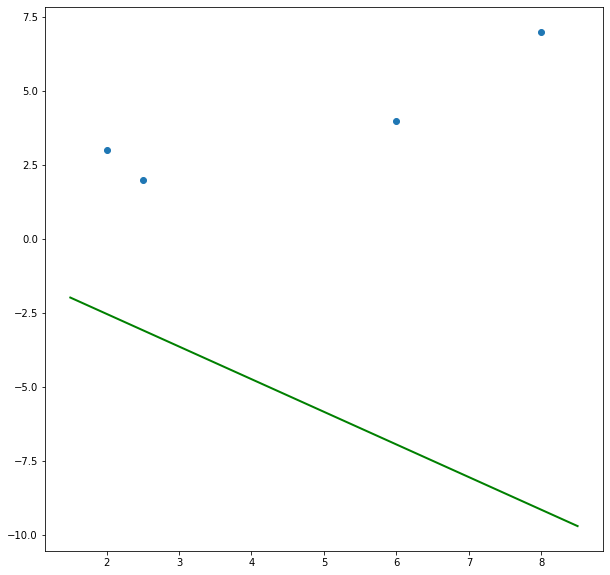

In [8]:
## valor mínimo menos .5 y valor máximo más .5 en la variable independiente 
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5

y_min = (-finalW[0]*x_min - 2*finalW[2])/finalW[1]
y_max = (-finalW[0]*x_max - 2*W[2])/finalW[1]

plt.scatter(X[:,0], X[:,1])
plt.plot([x_min, x_max], [y_min, y_max], c='g', lw=2)

# ADALINE

* Función de Activación: Identidad o función lineal
* Error: $\varepsilon = \frac{1}{2}(\bar{y}-y)^2$, 
* El adaline (de ADAptative LINear Element) es un tipo de red neuronal artificial cuyo modelo está basado en la Neurona de McCulloch-Pitts. Generalmente se compone de una sola capa de n neuronas ( por tanto n valores de salida ) con m entradas. [bbb1]
* A diferencia del perceptrón, cuando se modifican los pesos durante el entrenamiento, el Adaline tiene en cuenta el grado de corrección de la salida estimada respecto a la deseada.​ Para esto se aplica la regla Delta, la cual para un patrón de entrada $X^p$ con una salida estimada $Y^p$ y una salida deseada $d^p$, como $|d^p-y^p|$ [bbb1]
* "Con respecto al perceptrón, el Adaline posee la ventaja de que su gráfica de error es un hiperparaboloide que posee o bien un único mínimo global, o bien una recta de infinitos mínimos, todos ellos globales. Esto evita la gran cantidad de problemas que da el perceptrón a la hora del entrenamiento debido a que su función de error (también llamada de coste) posee numerosos mínimos locales."[bbb1]


W0:
[-0.99165956 -0.98559351 -0.99999771]

------------------
m: 0
y_cal
-5.940097362709021
error
6.940097362709021
Delta
[0.27760389 0.41640584 0.13880195]
W
[-0.71405567 -0.56918767 -0.86119577]

------------------
m: 1
y_cal
-3.7847102654806735
error
4.7847102654806735
Delta
[0.23923551 0.19138841 0.09569421]
W
[-0.47482015 -0.37779926 -0.76550156]

------------------
m: 2
y_cal
-7.208657581174013
error
7.208657581174013
Delta
[1.15338521 1.00921206 0.14417315]
W
[ 0.67856506  0.6314128  -0.62132841]

------------------
m: 3
y_cal
5.975713171329241
error
-5.975713171329241
Delta
[-0.71708558 -0.47805705 -0.11951426]
W
[-0.03852052  0.15335575 -0.74084267]


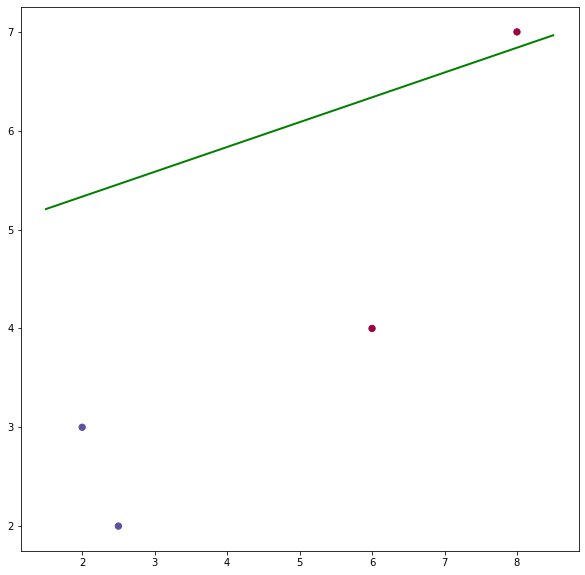

In [10]:
# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

#==========================
# PASO 1
# Al igual que en el perceptrón se asignan los pesos iniciales de manera aleatoria con una semilla. Y se guardan en el vector W.
W = 0.02*np.random.random((X.shape[1])) - 1
print ("\nW0:"); print (W)

#a: VALOR CRITICO, es una constante de aprendizaje, normalmente en el rango de 0,1 < α < 1.

a = 0.02
#=========================
#PASO 2
#Se parte del mismo vector de entrada X de entrenamiento anterior y del mismo vector Y target.  
#Se realiza el calculo de y_cal a través del producto punto como en el caso anterior.
for m in range(X.shape[0]):
    print ("\n------------------\nm: %d" %m)
    y_cal = np.dot(X[m],W)
    print ("y_cal"); print (y_cal)

#=========================
#PASO 3
  #Se determina el cambio de los pesos a través del delta:
  

Se determina el cambio de los pesos a través del delta asi:
$\delta W_{ij}=\alpha (Yj-yj)X_i$
Donde Yj representa la salida deseada y α es la constante de aprendizaje.

error
-5.975713171329241
Delta
[-0.71708558 -0.47805705 -0.11951426]
W
[-0.7556061  -0.3247013  -0.86035694]


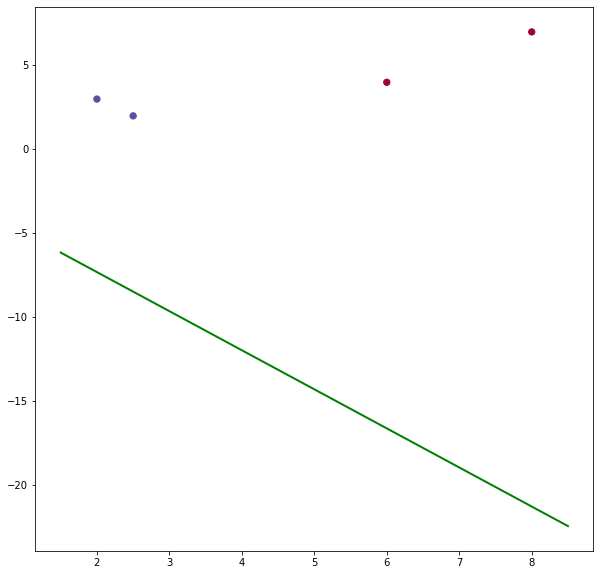

In [11]:
  
    error = y[m] - y_cal
    print ("error");     print (error)
    Delta = a*error*X[m]
    print ("Delta");     print (Delta)

#=========================
#PASO 4
#Se actualizan los pesos com W_ij(K+1) = Wij(K)+ ∆wij
    # update weights
    W = W + Delta
    print ("W");     print (W)

#===========================================
#===========================================

y_min = (-W[0]*x_min - W[2])/W[1]
y_max = (-W[0]*x_max - W[2])/W[1]

plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.plot([x_min, x_max], [y_min, y_max], c='g', lw=2)

1
-0.0852878711171019

W
[-0.24146754  0.0853567   1.10226117]


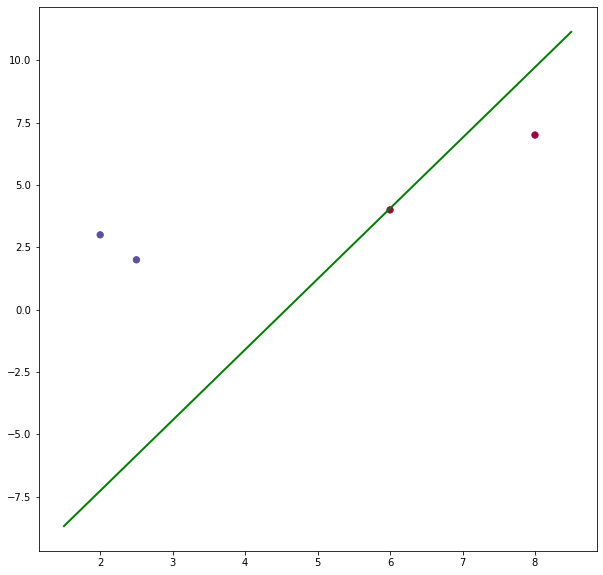

In [12]:
#A countinuación se presenta el proceso iterativo de todos los pasos descritos para ADALINE
# MUCHAS ITERACIONES
j = 0
while j == 0:
    Merror = 0
    for m in range(X.shape[0]):
        y_cal = np.dot(X[m],W)
    #=========================
    #PASO 3
        error = y[m] - y_cal
        Delta = a * error * X[m] 
    #=========================
    #PASO 4
        # update weights
        W = W + Delta
        Merror = Merror + np.absolute(error)
    if Merror < 0.6: 
        j = 1
    #===========================================
    #===========================================

print(j)
print(error)
print ("\nW");     print (W)
y_min = (-W[0]*x_min - W[2])/W[1]
y_max = (-W[0]*x_max - W[2])/W[1]

plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.plot([x_min, x_max], [y_min, y_max], c='g', lw=2)

# A Neural Network in 11 lines of Python

* https://iamtrask.github.io/2015/07/12/basic-python-network/

Una red neuronal entrenada con backpropagation intenando usar la entrada para predecir la salida. 

* In   -->	Out
* 0   0   1    -->      0
* 1 	1 	1 -->	1
* 1 	0 	1 -->	1
* 0 	1 	1 -->	0

# Caso: Redes Neuronales de 2 Capas -- Perceptron
<h3> Capa de Entrada más Capa de Salida (capa de neuronas)</h3>

* https://iamtrask.github.io/2015/07/12/basic-python-network/


In [14]:
import numpy as np

# La funcion de activación tipo sigmoide

def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

#==============================================
#  X: Input dataset matrix where each row is a training example
# X es el arreglo de entrada con dos caracteristicas en este caso
X = np.array([  [2.0,3.0],
                [2.5,2.0],
                [8.0,7.0],
                [6.0,4.0] ])

#==============================================
# y: Output dataset matrix where each row is a training example
# Y: salida de la matrix de dataset donde cada fila es target para cada ejemplo de entrenamiento 
y = np.array([[1,1,0,0]]).T

# seed random numbers to make calculation
# deterministic (just a good practice)
#Al igual que antes se inicializan los pesos con valores aleatorios
np.random.seed(1)

# initialize weights randomly with mean 0


# syn0: Corresponde a la capa de pesos para Synapse 0, conectando l0 to l1.
syn0 = 2*np.random.random((X.shape[1],1)) - 1

for iter in range(10000):

    # forward propagation // propagación hacia adelante
    # l0:Primera capa de la neurona, definida por el usuario
    # l1: Segunda capa de la red, También llamada capa oculta o intermedia
    
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    
    l1_error = y - l1

    # multiplicar el valor del error por la pendiente del sigmoide en los valores de l1
    l1_delta = l1_error * nonlin(l1,True)

    # Relizar la actualización de pesos.
    syn0 += np.dot(l0.T,l1_delta)

print ("Output After Training:")
print (l1)



Output After Training:
[[0.94676628]
 [0.14457779]
 [0.02092259]
 [0.00120011]]


# Ejemplo de problema no lineal

* Inputs --> Output
* 0 0 1 --> 0
* 0 1 1 --> 1
* 1 0 1 --> 1
* 1 1 1 --> 0

In [18]:
import numpy as np
#Otro ejemplo con funcion sigmoide
# sigmoid function
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

#==============================================
#  X: Input dataset matrix where each row is a training example
X = np.array([  [0,0,1],
                [1,1,1],
                [1,0,1],
                [0,1,1] ])

#==============================================
# y: Output dataset matrix where each row is a training example
y = np.array([[0,1,1,0]]).T

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
# syn0: First layer of weights, Synapse 0, connecting l0 to l1.
syn0 = 2*np.random.random((X.shape[1],1)) - 1

for iter in range(10000):

    # forward propagation
    # l0: First Layer of the Network, specified by the input data
    # l1: Second Layer of the Network, otherwise known as the hidden layer
    
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    
    # how much did we miss?
    l1_error = y - l1

    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * nonlin(l1,True)

    # update weights
    syn0 += np.dot(l0.T,l1_delta)

print ("Output After Training:")
print (l1)



Output After Training:
[[0.00966449]
 [0.99211957]
 [0.99358898]
 [0.00786506]]




# Caso: Redes Neuronales de 3 Capas -- UNA Capa Oculta

* https://iamtrask.github.io/2015/07/12/basic-python-network/


In [24]:
import numpy as np

#Funcion de activación
def nonlin(x,deriv=False):
	if(deriv==True):
	    return x*(1-x)
	return 1/(1+np.exp(-x))
    
X = np.array([[0,0,1],
             [0,1,1],
             [1,0,1],
             [1,1,1]])
                
y = np.array([[0],
			 [1],
			 [1],
			 [0]])

np.random.seed(1)

# inicialización aleatoria de los pesos para las capas 
syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1

print (syn0)
print (syn1)

for j in range(60000):

	# Aplicación del algoritmo Feed forward a través de las capas 0, 1, y 2
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))

    # Error con respecto al target
    l2_error = y - l2
    
    if (j% 10000) == 0:
        print ("Error:" + str(np.mean(np.abs(l2_error))))
        
    #Actualizacion pesos
    l2_delta = l2_error*nonlin(l2,deriv=True)

    # Contribución progresiva del error entre capas
    l1_error = l2_delta.dot(syn1.T)
    
    # Actualización de pesos
    l1_delta = l1_error * nonlin(l1,deriv=True)

    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)

print (syn0)
print (syn1)

[[-0.16595599  0.44064899 -0.99977125 -0.39533485]
 [-0.70648822 -0.81532281 -0.62747958 -0.30887855]
 [-0.20646505  0.07763347 -0.16161097  0.370439  ]]
[[-0.5910955 ]
 [ 0.75623487]
 [-0.94522481]
 [ 0.34093502]]
Error:0.49641003190272537
Error:0.008584525653247155
Error:0.005789459862507812
Error:0.004629176776769985
Error:0.0039587652802736475
Error:0.0035101225678616744
[[ 4.6013571   4.17197193 -6.30956245 -4.19745118]
 [-2.58413484 -5.81447929 -6.60793435 -3.68396123]
 [ 0.97538679 -2.02685775  2.52949751  5.84371739]]
[[ -6.96765763]
 [  7.14101949]
 [-10.31917382]
 [  7.86128405]]


# Implementación de una  red Neural desde Scratch usando Python

* http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/

* https://github.com/dennybritz/nn-from-scratch/blob/master/nn-from-scratch.ipynb

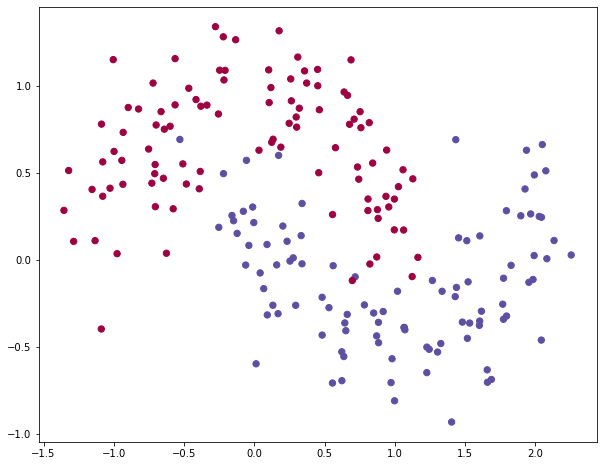

In [27]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Configuración de los plots
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

# Generar un dataset y  graficarlo
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)


In [28]:
# Entrenar el clasificador de regresión logística con funciones sklearn
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

LogisticRegressionCV()

Text(0.5, 1.0, 'Logistic Regression')

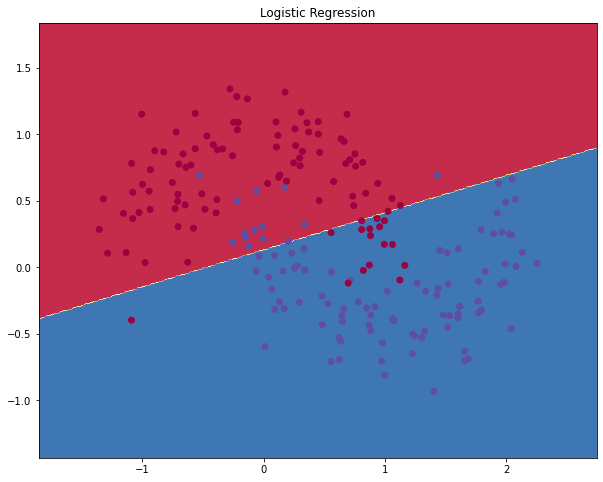

In [30]:
# Se crea una función auxiliar plot_decision_boundary para trazar un límite de decisión, genera el gráfico de contorno.
def plot_decision_boundary(pred_func):
    # Establece valores mínimos y máximos
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generar una cuadrícula de puntos con distancia h entre ellos.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predecir el valor de la función para todo el gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Trazar el contorno y ejemplos de entrenamiento
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    
    # Trazar el límite de decisión
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")


# Entrenamiento de una Red Neural 

In [33]:
num_examples = len(X) # tamaño del dataset de entrada(entrenamiento)
nn_input_dim = 2 # dimensión de capa entrada
nn_output_dim = 2 # dimensión de capa de salida

#Parámetros de descenso de gradiente 
epsilon = 0.01 # taza de aprendizaje
reg_lambda = 0.01 

# Función auxiliar para evaluar la pérdida total en el conjunto de datos
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Propagación directa para calcular las predicciones
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculo de cuanta es la perdida
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Agregar término de regulación a la pérdida (opcional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

# Función auxiliar para predecir una salida (0 o 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

# La siguiente función aprende parámetros para la red neuronal y devuelve el modelo.
# - nn_hdim:    Número de nodos en la capa oculta
# - num_passes: Número de pasadas a través de los datos de entrenamiento para descenso de gradiente
# - print_loss: Si es Verdadero, imprime la pérdida cada 1000 iteraciones
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # Inicializar los parámetros a valores aleatorios. De estos se realiza el aprendizaje
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # Resultado final
    model = {}
    
 
    for i in range(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Agregar términos de regularización
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Actualización del parámetro de descenso de gradiente
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Asignar nuevos parámetros al modelo.
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Impresión de la perdida
        if print_loss and i % 1000 == 0:
          print ("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    
    return model



# Aplicación en red con capa oculta de tamaño 3

Loss after iteration 0: 0.432387
Loss after iteration 1000: 0.068947
Loss after iteration 2000: 0.069125
Loss after iteration 3000: 0.070752
Loss after iteration 4000: 0.070748
Loss after iteration 5000: 0.070751
Loss after iteration 6000: 0.070754
Loss after iteration 7000: 0.070756
Loss after iteration 8000: 0.070757
Loss after iteration 9000: 0.070758
Loss after iteration 10000: 0.070758
Loss after iteration 11000: 0.070758
Loss after iteration 12000: 0.070758
Loss after iteration 13000: 0.070758
Loss after iteration 14000: 0.070758
Loss after iteration 15000: 0.070758
Loss after iteration 16000: 0.070758
Loss after iteration 17000: 0.070758
Loss after iteration 18000: 0.070758
Loss after iteration 19000: 0.070758


Text(0.5, 1.0, 'Limite de desición para capa oculta de tamaño 3')

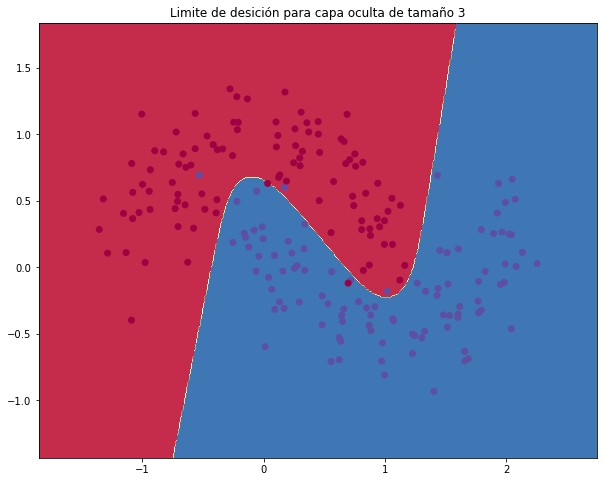

In [34]:
# Construcción de un modelo con una capa oculta tridimensional
model = build_model(3, print_loss=True)

# Trazar el límite de decisión
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Limite de desición para capa oculta de tamaño 3")



# Variación el tamaño de la capa oculta e impresión del limite desición

In [35]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()